In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy_healpix import HEALPix
from astropy.coordinates import Latitude, Longitude

from pyuvdata import AiryBeam, BeamInterface, GaussianBeam, ShortDipoleBeam, UniformBeam
import pyuvdata.utils as uvutils


In [2]:
nside = 64
ordering = "ring"
healpix_pixel_array = np.arange(12 * nside**2, dtype=int)
hp_obj = HEALPix(nside=nside, order=ordering)
hpx_lon, hpx_lat = hp_obj.healpix_to_lonlat(healpix_pixel_array)

za_array_full, az_array_full = uvutils.hpx_latlon_to_zenithangle_azimuth(
    hpx_lat.rad, hpx_lon.rad
)

to_uvbeam_kwargs = {
    "nside": nside,
    "ordering": ordering,
    "healpix_pixel_array": healpix_pixel_array,
}

above_horizon = np.nonzero(za_array_full <= (np.pi / 2.0))
az_array_ah = az_array_full[above_horizon]
za_array_ah = za_array_full[above_horizon]
az_array = az_array_ah[::10]
za_array = za_array_ah[::10]

nfreqs = 1
freq_array = np.linspace(100e6, 150e6, nfreqs)

analytic = ShortDipoleBeam()
uvb_efield = analytic.to_uvbeam(
    beam_type="efield",
    freq_array=freq_array,
    **to_uvbeam_kwargs,
)


efield_array_ah = uvb_efield.data_array[:,:,:,above_horizon]

# power_Ix = uvb_efield.data_array[0, 0] + uvb_efield.data_array[1, 0]
# power_Iy = uvb_efield.data_array[0, 1] + uvb_efield.data_array[1, 1]

# power_Ix_ah = power_Ix[:, above_horizon]
# power_Iy_ah = power_Iy[:, above_horizon]

uvb_power = analytic.to_uvbeam(
    beam_type="power",
    freq_array=freq_array,
    **to_uvbeam_kwargs,
)
power_array_ah = uvb_power.data_array[:,:,:,above_horizon]


In [3]:
hpx_lat.shape

(49152,)

In [4]:
above_horizon[0].shape

(24704,)

In [5]:
uvb_efield.data_array.shape

(2, 2, 1, 49152)

In [6]:
uvb_power.data_array.shape

(1, 4, 1, 49152)

In [7]:
uvb_power.polarization_array

array([-5, -6, -7, -8])

In [8]:
vec_dir = ["Azimuth", "Zenith"]
feed_list = ["x", "y"]
pol_list = ["xx", "yy", "xy", "yx"]

Casting complex values to real discards the imaginary part
Casting complex values to real discards the imaginary part


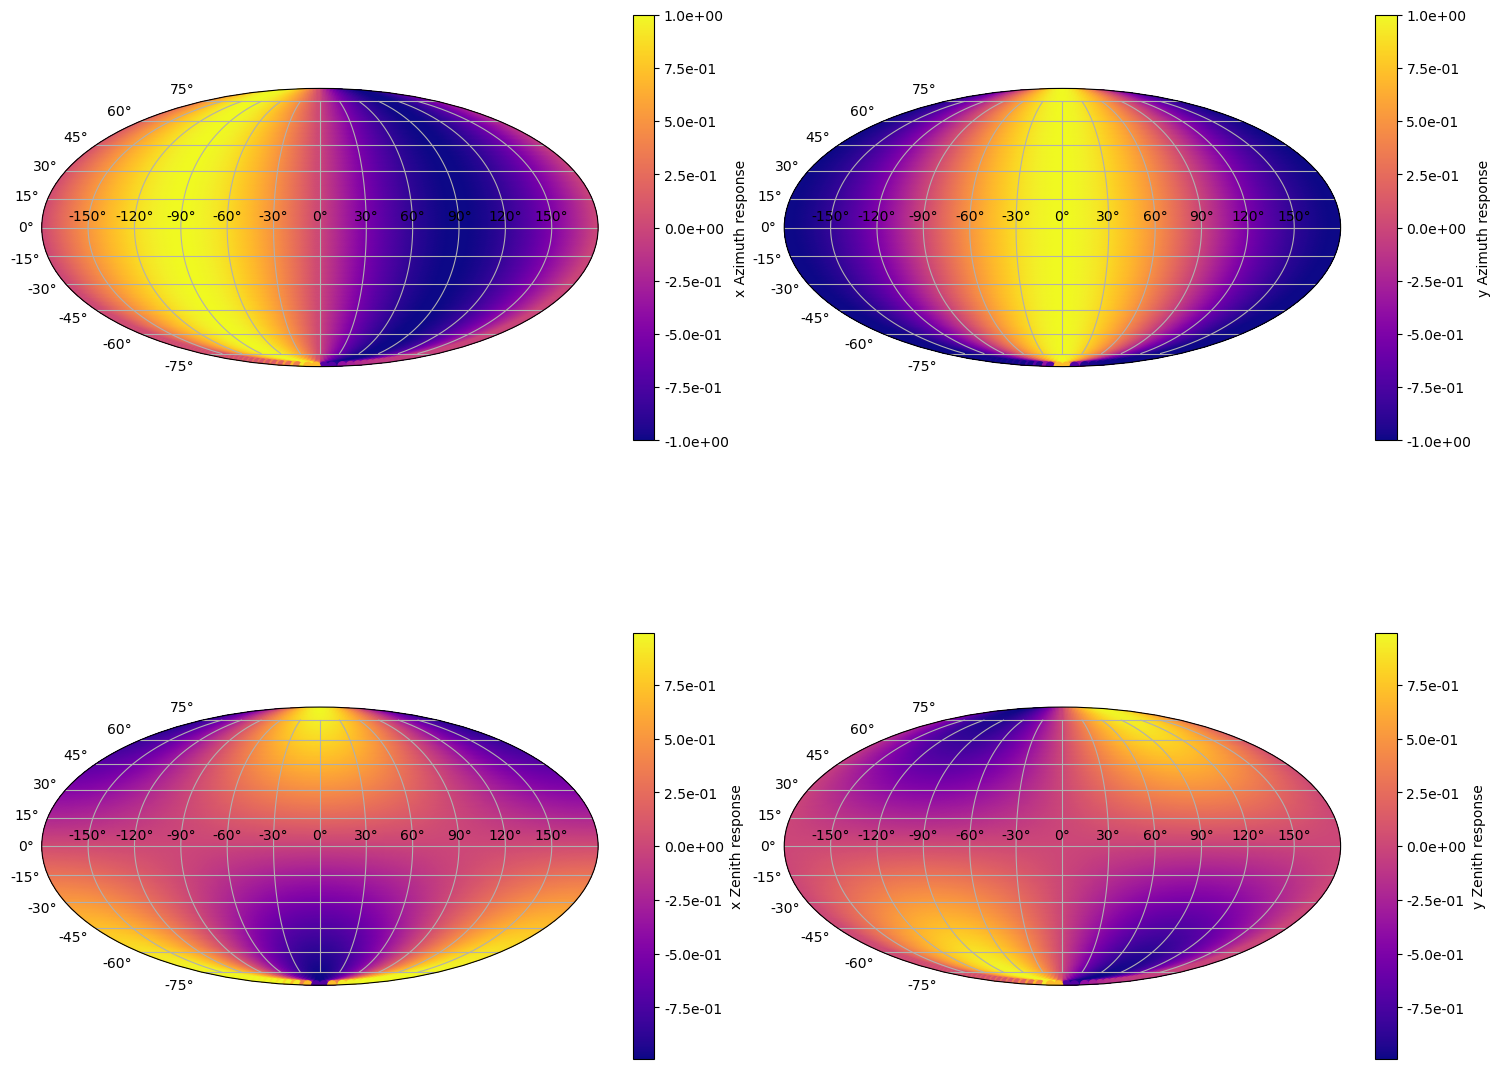

In [9]:
# Now plot the pixels on a Mollweide projection
fig, ax = plt.subplots(len(vec_dir), len(feed_list), subplot_kw={'projection': "mollweide"}, figsize=(15, 15))
fig.tight_layout()
for vi, dir in enumerate(vec_dir):
    for fi, feed in enumerate(feed_list):
        ax[vi, fi].grid(True)
        ec = ax[vi, fi].scatter(hpx_lon.wrap_at('180d').radian, hpx_lat.radian, c=uvb_efield.data_array[vi, fi,0,:], cmap="plasma")
        fig.colorbar(ec, ax=ax[vi, fi], label=f"{feed} {dir} response", orientation="vertical",shrink=.5, format="%4.1e")
plt.show()


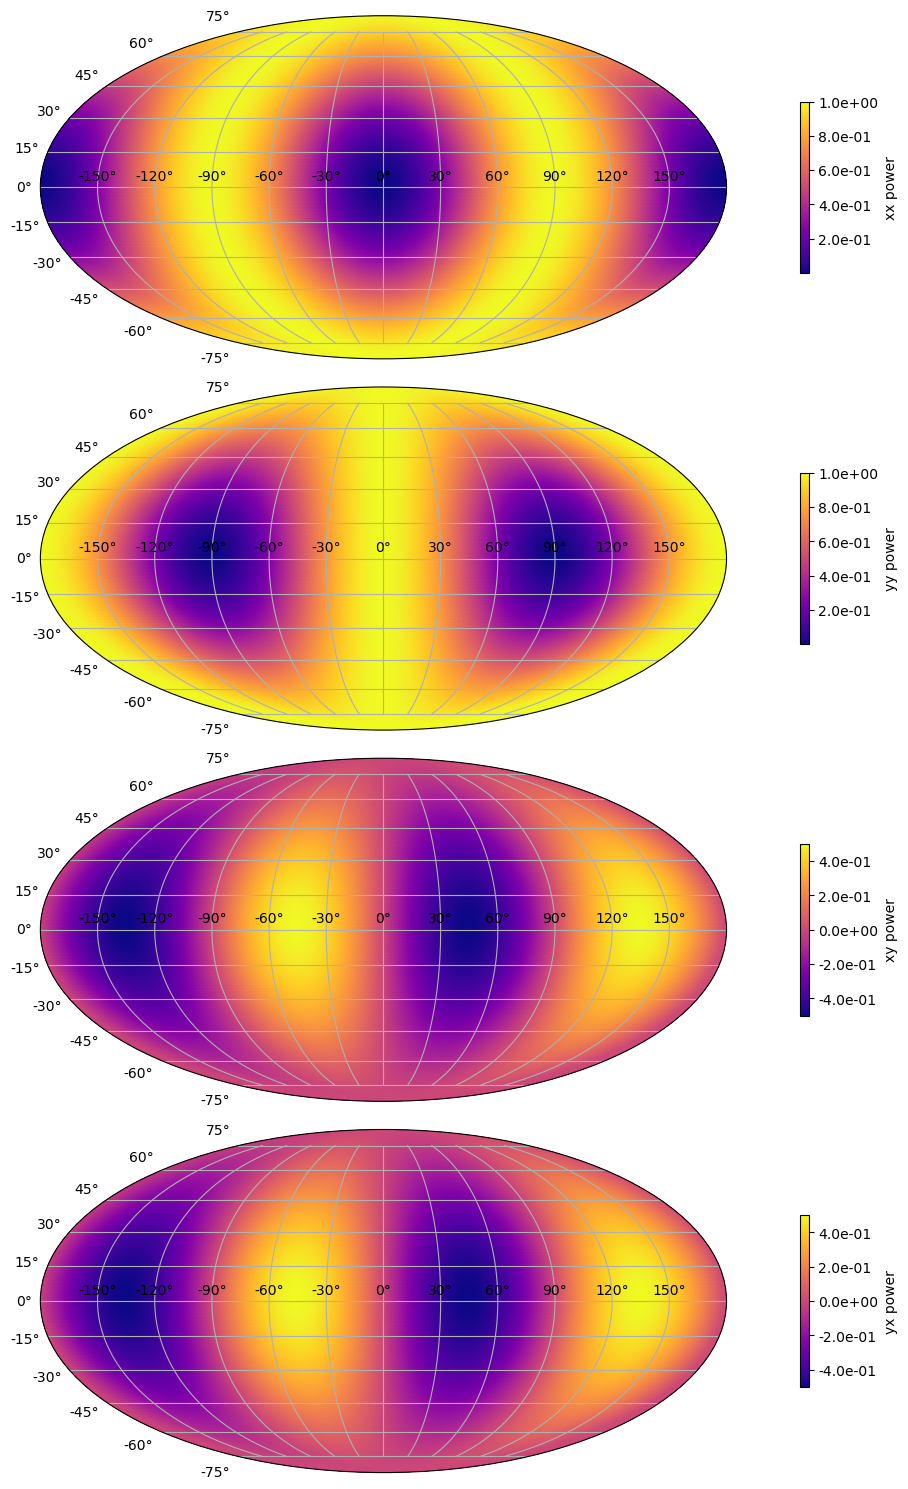

In [10]:
# Now plot the power on a Mollweide projection
fig, ax = plt.subplots(len(pol_list), 1, subplot_kw={'projection': "mollweide"}, figsize=(15, 15))
fig.tight_layout()
for pi, pol in enumerate(pol_list):
    ax[pi].grid(True)
    pow = ax[pi].scatter(hpx_lon.wrap_at('180d').radian, hpx_lat.radian, c=uvb_power.data_array[0, pi], cmap="plasma")
    fig.colorbar(pow, ax=ax[pi], label=f"{pol} power", orientation="vertical",shrink=.5, format="%4.1e")
plt.show()


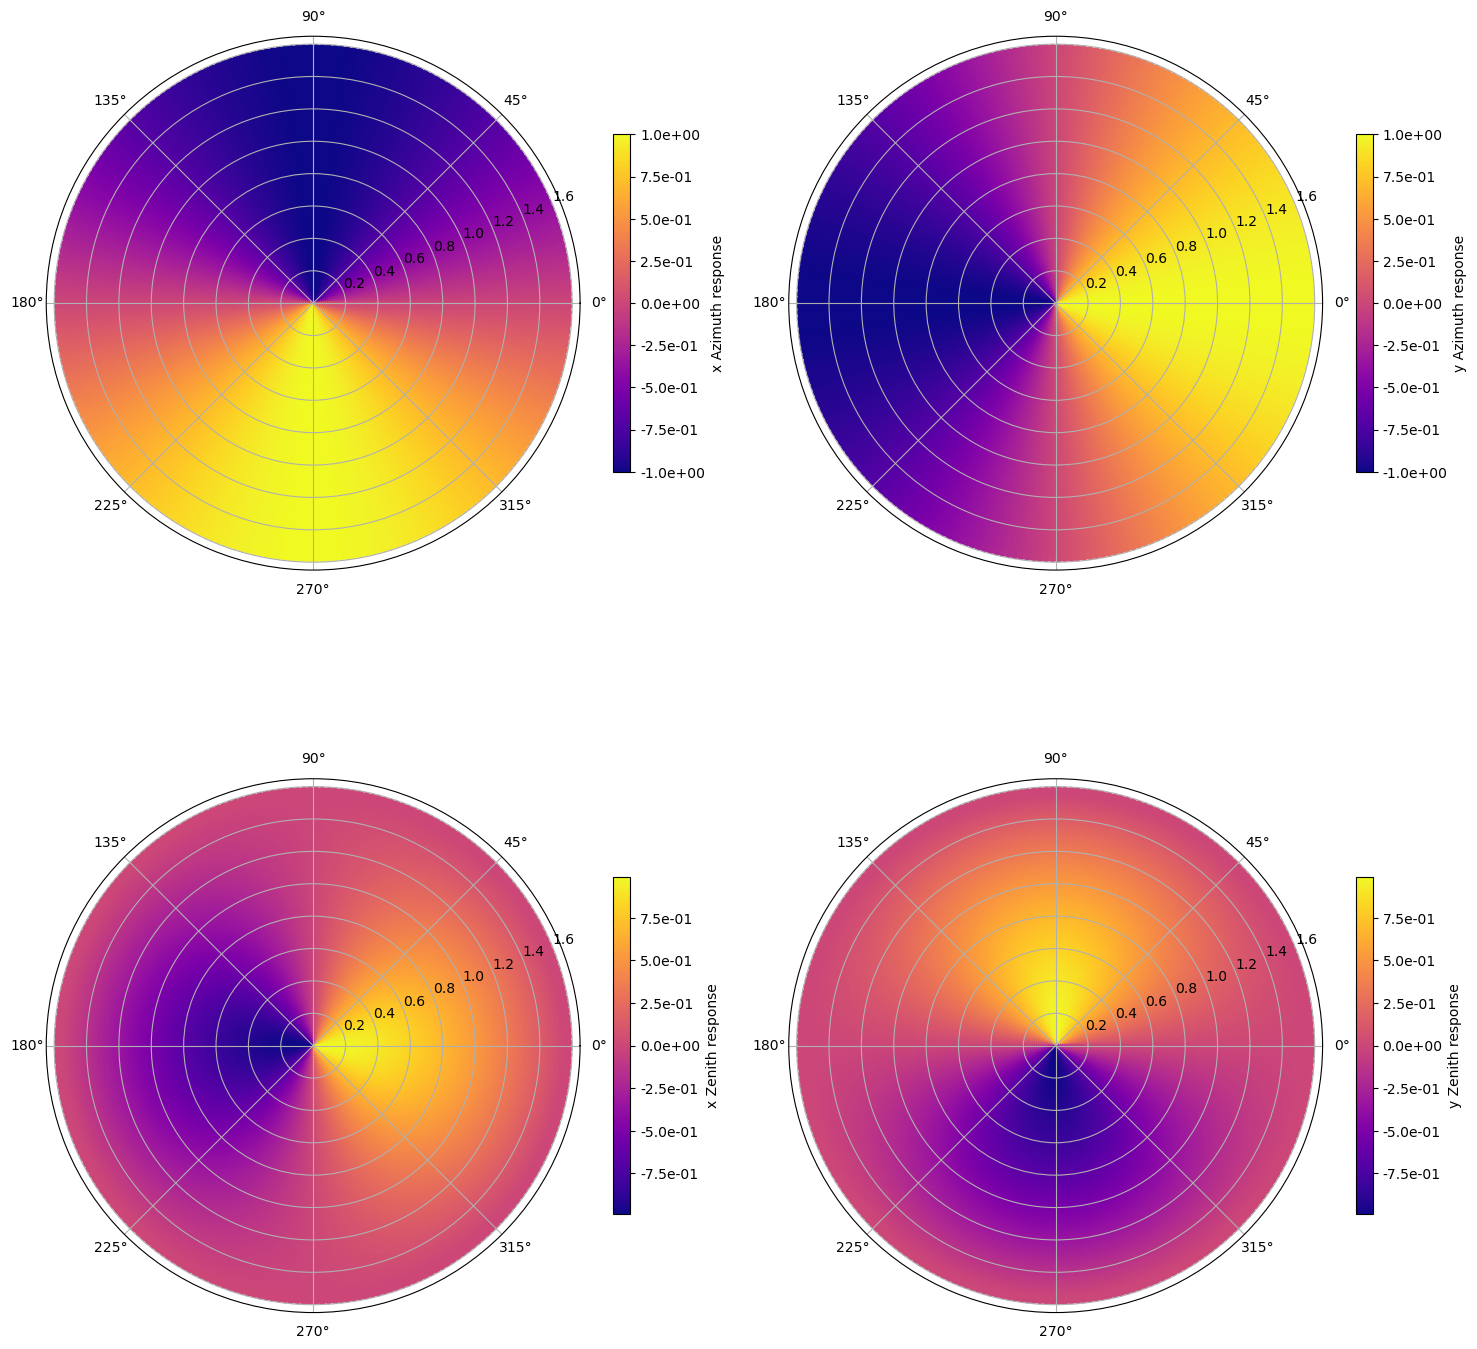

In [11]:
# Now plot the pixels on a polar projection
az_array_wrapped = Longitude(az_array_ah, unit="rad").wrap_at('180d').radian
fig, ax = plt.subplots(len(vec_dir), len(feed_list), subplot_kw={'projection': "polar"}, figsize=(15, 15))
fig.tight_layout()
for vi, dir in enumerate(vec_dir):
    for fi, feed in enumerate(feed_list):
        ax[vi, fi].grid(True)
        pvf = ax[vi, fi].scatter(az_array_wrapped, za_array_ah, c=efield_array_ah[vi,fi,0,:], cmap="plasma")
        cbar=plt.colorbar(pvf, ax=ax[vi, fi], label=f"{feed} {dir} response", orientation="vertical",shrink=.5, format="%4.1e")
plt.show()

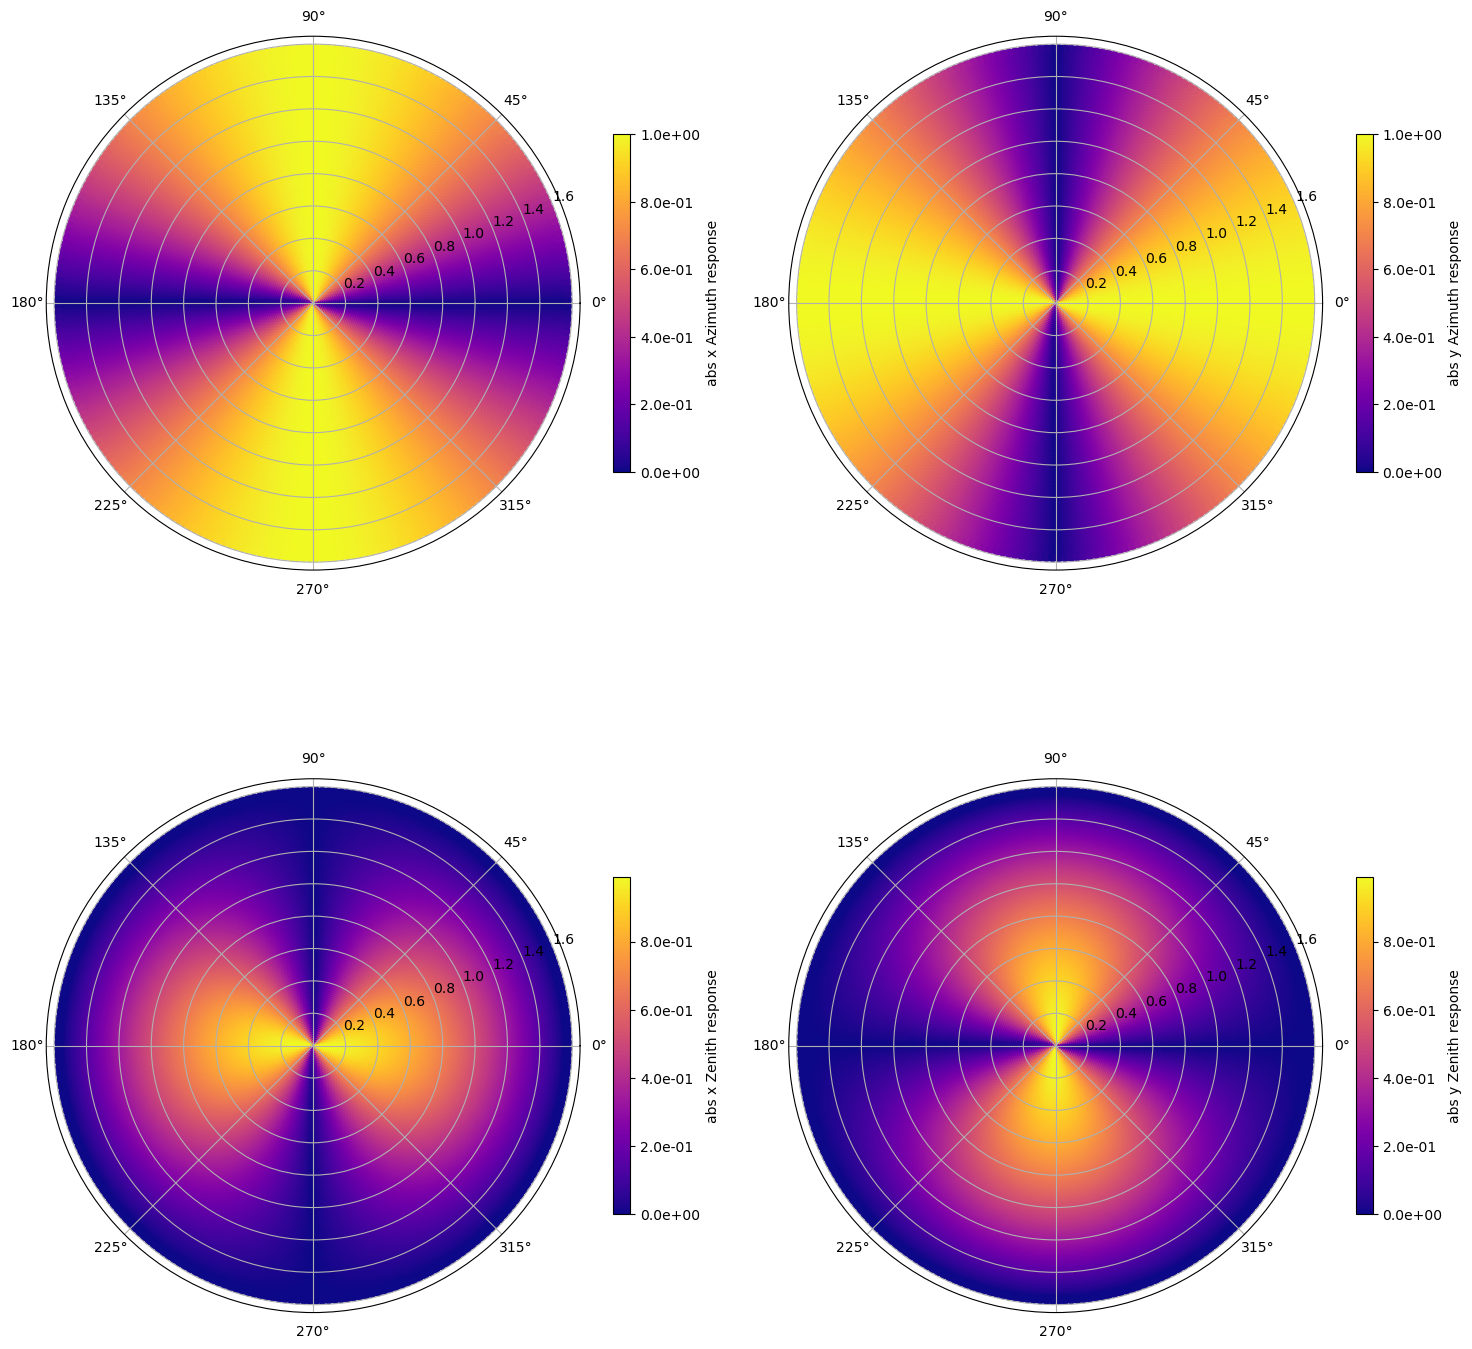

In [12]:
fig, ax = plt.subplots(len(vec_dir), len(feed_list), subplot_kw={'projection': "polar"}, figsize=(15, 15))
fig.tight_layout()
for vi, dir in enumerate(vec_dir):
    for fi, feed in enumerate(feed_list):
        ax[vi, fi].grid(True)
        pvf = ax[vi, fi].scatter(az_array_wrapped, za_array_ah, c=np.abs(efield_array_ah[vi,fi,0,:]), cmap="plasma")
        fig.colorbar(pvf, ax=ax[vi, fi], label=f"abs {feed} {dir} response", orientation="vertical",shrink=.5, format="%4.1e")
plt.show()

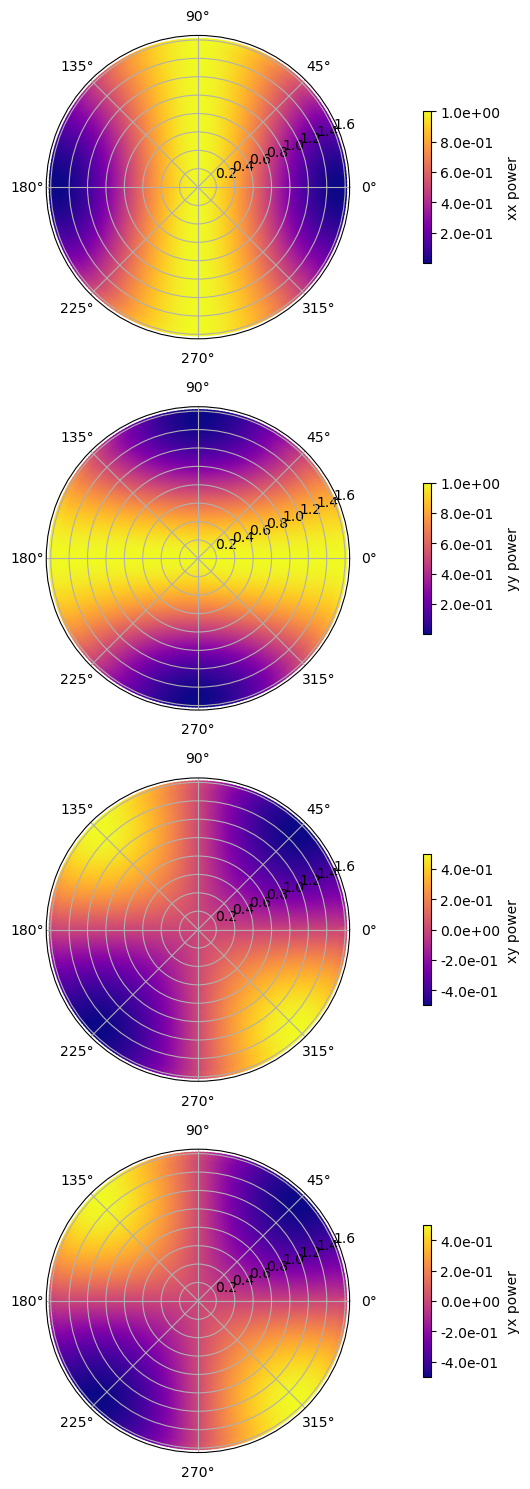

In [13]:
# Now plot the pixels on a polar projection
fig, ax = plt.subplots(len(pol_list), 1, subplot_kw={'projection': "polar"}, figsize=(15, 15))
fig.tight_layout()
for pi, pol in enumerate(pol_list):
    pow = ax[pi].scatter(az_array_wrapped, za_array_ah, c=power_array_ah[0, pi], cmap="plasma")
    fig.colorbar(pow, ax=ax[pi], label=f"{pol} power", orientation="vertical",shrink=.5, format="%4.1e")
plt.show()


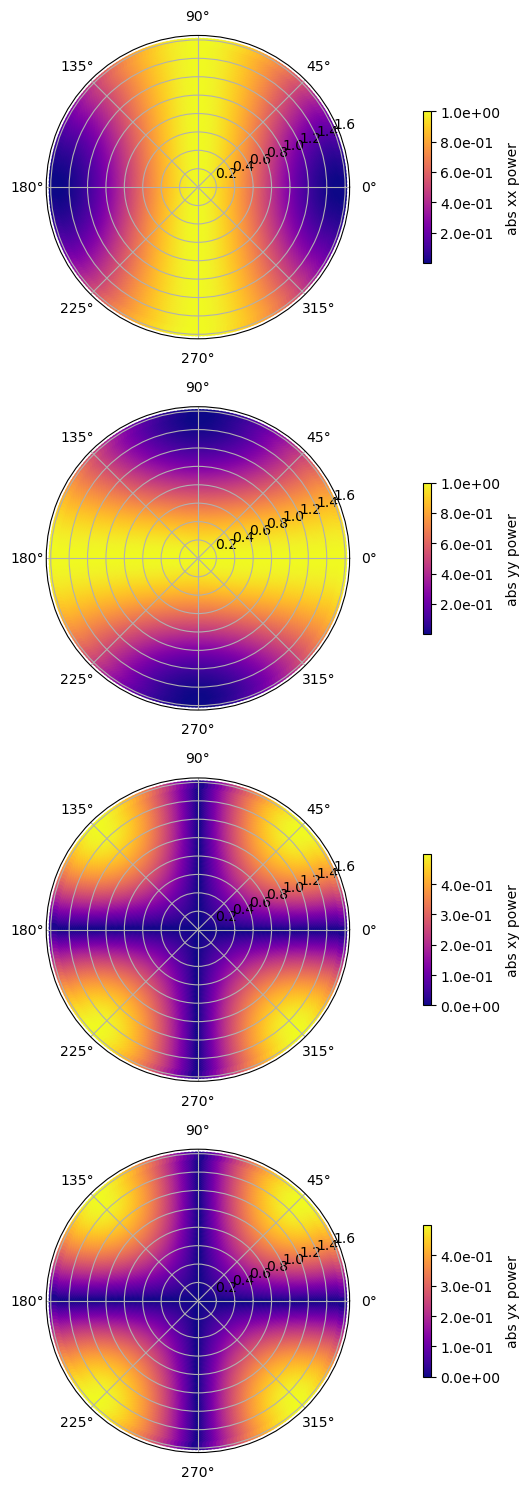

In [14]:
# Now plot the pixels on a polar projection
fig, ax = plt.subplots(len(pol_list), 1, subplot_kw={'projection': "polar"}, figsize=(15, 15))
fig.tight_layout()
for pi, pol in enumerate(pol_list):
    pow = ax[pi].scatter(az_array_wrapped, za_array_ah, c=np.abs(power_array_ah[0, pi]), cmap="plasma")
    fig.colorbar(pow, ax=ax[pi], label=f"abs {pol} power", orientation="vertical",shrink=.5, format="%4.1e")
plt.show()


PolarAxes(0.125,0.11;0.775x0.77)


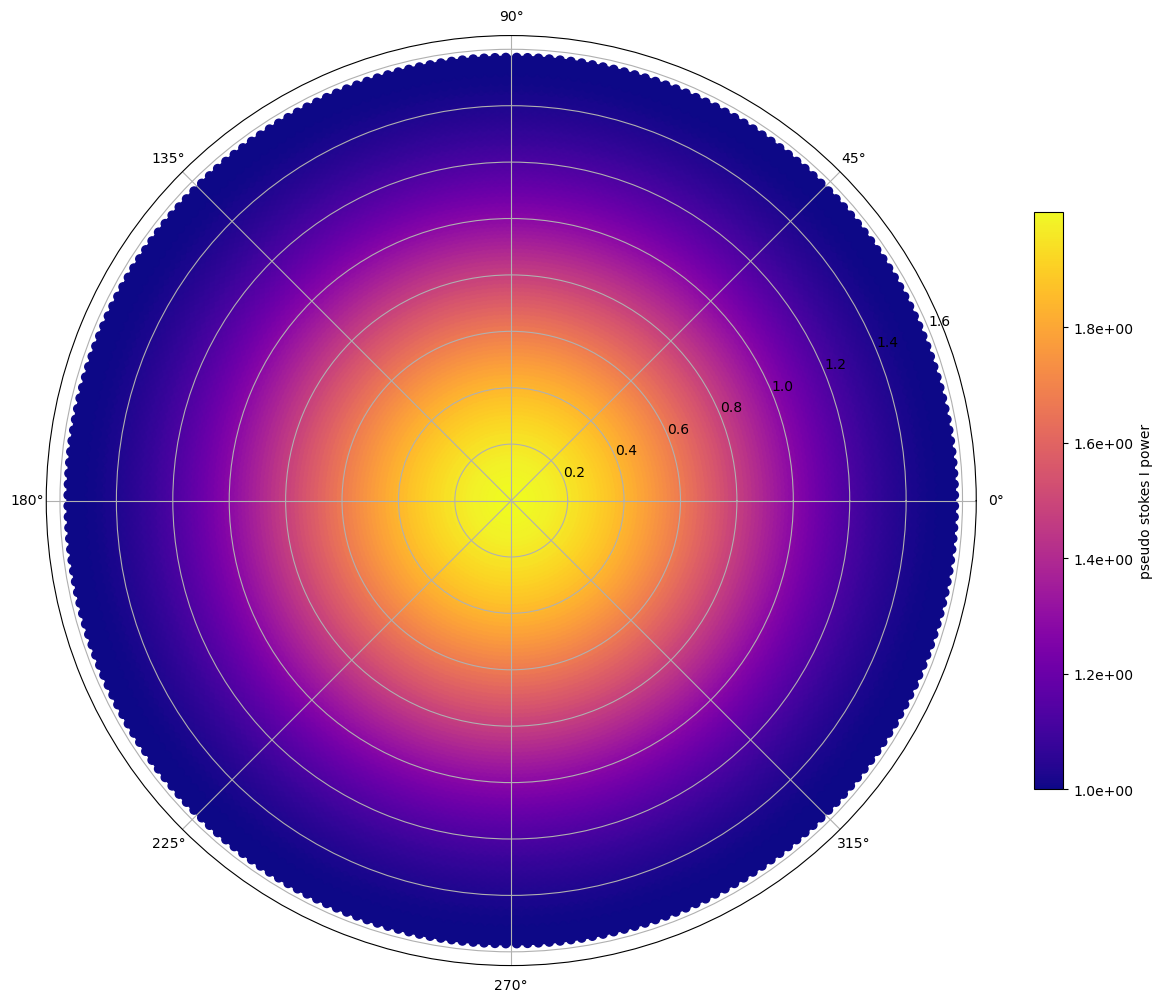

In [15]:
fig, ax = plt.subplots(1, subplot_kw={'projection': "polar"}, figsize=(15, 15))
print(ax)
pow = ax.scatter(az_array_wrapped, za_array_ah, c=power_array_ah[0, 0] + power_array_ah[0, 1], cmap="plasma")
fig.colorbar(pow, ax=ax, label=f"pseudo stokes I power", orientation="vertical",shrink=.5, format="%4.1e")
plt.show()
